**pandas demo**

_Евгений Борисов <esborisov@sevsu.ru>_

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_colwidth = 200 # ширина таблицы pandas при печати
np.set_printoptions(precision=2) # вывод на печать до 2 знака

In [4]:
# from tqdm import tqdm
# tqdm.pandas() # progressbar для pandas 

---

In [5]:
# будем использовать модуль datasets библиотеки sklearn
# для получения модельных данных
from sklearn import __version__ as sklearn_version
print(sklearn_version)

1.0.2


In [6]:
# загружаем данные о цветах
from sklearn.datasets import load_iris
data = load_iris()

In [7]:
# структура содержит таблицу с цифрами, текстовое описание описание данных и др.

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
set(data['target'])

{0, 1, 2}

In [13]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
data['filename']

'iris.csv'

---

In [15]:
# строим из данных Pandas DataFrame
df = pd.DataFrame(data['data'],columns=data['feature_names'])
print(len(df))
df

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# добавляем слолбец target (номер класса)
df['target'] = data['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
# строим словарь  номер класса - название 
name_map = { i:s for i,s in enumerate(data['target_names']) } 
name_map

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [18]:
df['target_names'] = df['target'].map(name_map)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [19]:
# список столбцов
df.columns.to_list()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'target_names']

In [20]:
# первые строки таблицы
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [21]:
# последние строки таблицы
df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [22]:
# случайная выборка из таблицы
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
109,7.2,3.6,6.1,2.5,2,virginica
19,5.1,3.8,1.5,0.3,0,setosa
45,4.8,3.0,1.4,0.3,0,setosa


In [23]:
# статистики по столбцам
df.describe(percentiles=[.1,.99])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
10%,4.800000,2.500000,1.400000,0.200000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
99%,7.700000,4.151000,6.700000,2.500000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


---

In [24]:
# выборка из таблицы
df[ df['sepal width (cm)']<2.3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
60,5.0,2.0,3.5,1.0,1,versicolor
62,6.0,2.2,4.0,1.0,1,versicolor
68,6.2,2.2,4.5,1.5,1,versicolor
119,6.0,2.2,5.0,1.5,2,virginica


---

In [25]:
# минимальные значения по классам
df.groupby('target_names').min()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_names,,,,,
setosa,4.3,2.3,1.0,0.1,0
versicolor,4.9,2.0,3.0,1.0,1
virginica,4.9,2.2,4.5,1.4,2


In [26]:
# количество по классам
df.groupby('target_names').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_names,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,50,50,50,50,50


<AxesSubplot:>

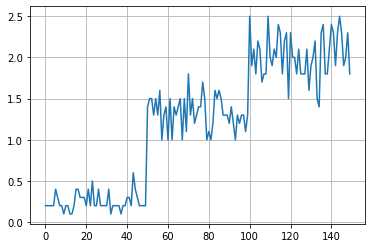

In [27]:
# простой график значений по слобцу 
df['petal width (cm)'].plot(grid=True)

<AxesSubplot:ylabel='Frequency'>

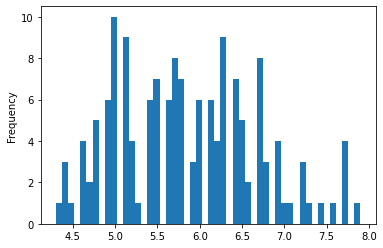

In [28]:
# гистограмма по столбцу
df['sepal length (cm)'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

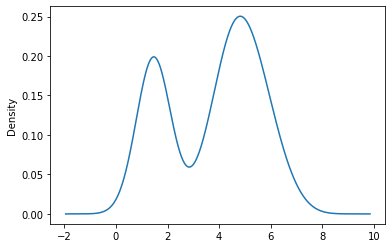

In [29]:
# оценка плотности распределения по столбцу
df['petal length (cm)'].plot.kde()

In [30]:
# df.merge()

In [31]:
# df['target_names'].map(lambda s: s.split('-'))

----

In [32]:
# количество пропусков в таблице
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

In [33]:
# портим данные, 
# выкидываем значения из случайно выбранных ячеек

c = np.random.randint(0,df.columns.size,df.columns.size,)
r = np.random.randint(0,df.count()[0],df.count()[0])

df.iloc[r,c] = None

c,r

(array([0, 0, 5, 2, 0, 4]),
 array([136,  95, 107,  74, 118, 113,  79,   8,  26, 145,  55,  98,  32,
          1,  21,   7,  78,   0,  90, 123, 117,  41,  57, 127, 104,  59,
         14,  20, 115,  14,   3,  15,  96, 134, 133,  85, 117,  47,   7,
         62,  97,  82, 149, 137,  48,  93,  48, 145, 140,  75, 136, 120,
          2, 134, 128, 144,  88, 132,  91,  33, 116,  30,  70,  83,  59,
         70,  26,  43, 128,  14,  11,  93,  11, 140,  45, 124,  62, 124,
          0, 136,  22,  42,  84,  90, 131, 136,  50, 131,   0,  99,  40,
         69,  98,  17,  82,  16,  32,  33,   8, 143,  13,  31,  10, 142,
         57,  22,  57,  56,   3, 119, 149,  99, 105,  93,  45,  59,  51,
         85,  18, 112,  75,  59, 126, 148,  96, 100,  93, 131,  28,   2,
         50,  96,  79,  75, 138,  63,  60,  37,  38, 144, 111,  79, 122,
        138, 107,  78, 120, 146,  46,   5]))

In [34]:
# заполняем пропуски нулями
df.fillna(0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,0.0,3.5,0.0,0.2,0.0,0
1,0.0,3.0,0.0,0.2,0.0,0
2,0.0,3.2,0.0,0.2,0.0,0
3,0.0,3.1,0.0,0.2,0.0,0
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,0.0,3.0,0.0,2.3,0.0,0
146,0.0,2.5,0.0,1.9,0.0,0
147,6.5,3.0,5.2,2.0,2.0,virginica
148,0.0,3.4,0.0,2.3,0.0,0


In [35]:
# записи не содержащие пропусков
df[~df.isnull().any(axis=1)].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
4,5.0,3.6,1.4,0.2,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa
12,4.8,3.0,1.4,0.1,0.0,setosa
19,5.1,3.8,1.5,0.3,0.0,setosa


In [36]:
# количество пропусков в таблице
df.isnull().sum()

sepal length (cm)    96
sepal width (cm)      0
petal length (cm)    96
petal width (cm)      0
target               96
target_names         96
dtype: int64

In [37]:
df.dropna() # удаление записей с пропусками

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
4,5.0,3.6,1.4,0.2,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa
12,4.8,3.0,1.4,0.1,0.0,setosa
19,5.1,3.8,1.5,0.3,0.0,setosa
23,5.1,3.3,1.7,0.5,0.0,setosa
24,4.8,3.4,1.9,0.2,0.0,setosa
25,5.0,3.0,1.6,0.2,0.0,setosa
27,5.2,3.5,1.5,0.2,0.0,setosa
29,4.7,3.2,1.6,0.2,0.0,setosa


In [38]:
df.fillna(.0) # заполнение пропусков

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,0.0,3.5,0.0,0.2,0.0,0.0
1,0.0,3.0,0.0,0.2,0.0,0.0
2,0.0,3.2,0.0,0.2,0.0,0.0
3,0.0,3.1,0.0,0.2,0.0,0.0
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,0.0,3.0,0.0,2.3,0.0,0.0
146,0.0,2.5,0.0,1.9,0.0,0.0
147,6.5,3.0,5.2,2.0,2.0,virginica
148,0.0,3.4,0.0,2.3,0.0,0.0


In [39]:
df.ffill() # заполнение пропусков из предыдущей строки

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,NaN,3.5,NaN,0.2,NaN,None
1,NaN,3.0,NaN,0.2,NaN,None
2,NaN,3.2,NaN,0.2,NaN,None
3,NaN,3.1,NaN,0.2,NaN,None
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.9,3.0,5.1,2.3,2.0,virginica
146,6.9,2.5,5.1,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.5,3.4,5.2,2.3,2.0,virginica


In [40]:
df.bfill()# заполнение пропусков из cледующей строки

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.0,3.5,1.4,0.2,0.0,setosa
1,5.0,3.0,1.4,0.2,0.0,setosa
2,5.0,3.2,1.4,0.2,0.0,setosa
3,5.0,3.1,1.4,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.5,3.0,5.2,2.3,2.0,virginica
146,6.5,2.5,5.2,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,NaN,3.4,NaN,2.3,NaN,None


In [41]:
df.ffill(axis=1) # заполнение пропусков из предыдущего стролбца

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,NaN,3.5,3.5,0.2,0.2,0.2
1,NaN,3.0,3.0,0.2,0.2,0.2
2,NaN,3.2,3.2,0.2,0.2,0.2
3,NaN,3.1,3.1,0.2,0.2,0.2
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,NaN,3.0,3.0,2.3,2.3,2.3
146,NaN,2.5,2.5,1.9,1.9,1.9
147,6.5,3.0,5.2,2.0,2.0,virginica
148,NaN,3.4,3.4,2.3,2.3,2.3


In [42]:
df.bfill(axis=1) # заполнение пропусков из cледующей стролбца

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,3.5,3.5,0.2,0.2,NaN,NaN
1,3.0,3.0,0.2,0.2,NaN,NaN
2,3.2,3.2,0.2,0.2,NaN,NaN
3,3.1,3.1,0.2,0.2,NaN,NaN
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,3.0,3.0,2.3,2.3,NaN,NaN
146,2.5,2.5,1.9,1.9,NaN,NaN
147,6.5,3.0,5.2,2.0,2.0,virginica
148,3.4,3.4,2.3,2.3,NaN,NaN


## eurostat

In [43]:
# !pip install eurostat

In [44]:
# статистика по странам Евросоюза
# https://ec.europa.eu/eurostat

import eurostat

In [45]:
# список тем в источнике
toc = eurostat.get_toc_df().drop_duplicates()

In [46]:
toc.sample(20)

,title,code,type,last update of data,last table structure change,data start,data end
2915,Students in ISCED 1-3 by modern foreign language studied,educ_enrllng1,dataset,25.09.2014,08.02.2021,1998,2012
711,Broadband and connectivity - individuals,isoc_bde15b_i,dataset,04.02.2022,08.02.2021,2002,2019
5269,"Turnover by product in wholesale trade (NACE Rev. 1.1, G51, 1998)",dt_cpa_3d51_98,dataset,26.03.2009,08.02.2021,1998,1998
5395,"Degree of success, choice of financial institution and reasons of partial success or unsuccess",acf_deg,folder,,,,
2431,"Persons reporting a work-related health problem by sex, age and size of enterprise",hsw_pb9,dataset,02.02.2022,,2007,2020
4542,People living in households with very low work intensity by broad group of citizenship (population aged 18 to 64 years),ilc_lvhl15n,dataset,03.02.2022,03.02.2022,2015,2020
1794,"Third-country nationals returned following an order to leave, by type of return, citizenship, country of destination, age and and sex – quarterly data",migr_eirtn1,dataset,20.12.2021,20.12.2021,2018Q1,2021Q3
3352,"Precarious employment by sex, age and NACE Rev. 1.1 activity",lfsa_qoe_4ax1r1,dataset,14.04.2021,14.04.2021,2000,2008
1781,Transfers,migr_dubtransf,folder,,,,
8937,Final consumption expenditure of households and non-profit institutions serving households - annual data,tipsna51,table,03.02.2022,03.02.2022,1995,2021


In [47]:
toc[['type','code']].groupby('type').count() # типы данных в источнике

,code
type,
dataset,5725
folder,1810
table,1092


In [48]:
# toc[ toc['type']=='table' ]

In [49]:
# Animal populations by NUTS 2 regions
df = eurostat.get_data_df('tgs00045')
df

,animals,unit,geo\time,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,A2000,THS_HD,AT11,21.65,22.03,21.61,20.98,20.93,20.43,20.43,19.88,19.20,18.69,17.50,NaN
1,A2000,THS_HD,AT12,453.81,449.62,443.94,446.08,446.87,442.58,438.55,436.44,429.03,419.66,411.21,NaN
2,A2000,THS_HD,AT13,0.12,0.13,0.11,0.09,0.10,0.07,0.10,0.08,0.08,0.08,0.07,NaN
3,A2000,THS_HD,AT21,198.08,191.63,189.97,189.02,188.12,186.25,186.72,188.33,185.63,183.72,179.79,NaN
4,A2000,THS_HD,AT22,338.48,328.58,323.05,322.47,323.15,322.89,322.29,319.58,319.72,315.52,308.43,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,A4200,THS_HD,SK01,0.58,0.58,0.55,0.79,0.71,0.67,0.58,0.59,0.67,0.62,NaN,NaN
1203,A4200,THS_HD,SK02,9.52,9.20,9.37,9.41,9.53,9.44,9.50,9.61,9.15,8.91,NaN,NaN
1204,A4200,THS_HD,SK03,14.50,14.32,14.52,15.09,15.39,16.26,16.15,16.68,16.32,15.47,NaN,NaN
1205,A4200,THS_HD,SK04,10.69,9.95,10.38,10.17,9.55,9.96,10.12,10.18,10.77,10.60,NaN,NaN


<AxesSubplot:title={'center':'A2000 / THS_HD / IE02'}>

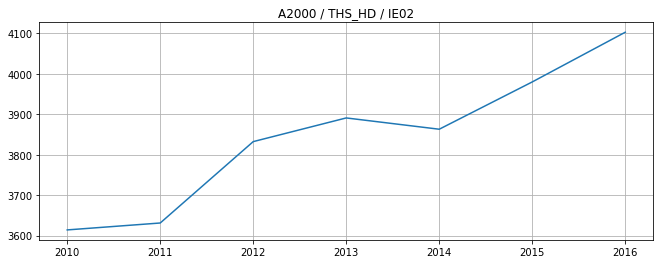

In [50]:
i=np.random.randint(len(df))
df.iloc[i,3:].plot( 
    grid=True,
    figsize=(11,4),
    title=' / '.join( df.iloc[i,:3].to_list() ) 
)

## wikipedia

In [51]:
# !pip install wikipedia

In [52]:
import wikipedia as wkp

wkp.set_lang('ru')

In [53]:
l = wkp.search('новичок')

In [54]:
print(l)

['Новичок', 'Новичок (отравляющие вещества)', 'Новичок (телесериал, 2018)', 'Новичок года НБА', 'Новичок (фильм, 1990)', 'Ан-12', 'Новичок (мультфильм)', 'Навальный (фильм)', 'Национальная баскетбольная лига', 'Новичок (веб-сериал)']


In [55]:
print( wkp.summary(l[1], sentences=1) )

«Новичо́к» (англ.


In [56]:
p = wkp.page(l[1])

In [57]:
print(p.title)

Новичок (отравляющие вещества)


In [58]:
print(p.url)

https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D0%B8%D1%87%D0%BE%D0%BA_(%D0%BE%D1%82%D1%80%D0%B0%D0%B2%D0%BB%D1%8F%D1%8E%D1%89%D0%B8%D0%B5_%D0%B2%D0%B5%D1%89%D0%B5%D1%81%D1%82%D0%B2%D0%B0)


In [59]:
print(p.links[:3],'....\n')

['1,2-Дихлорэтан', '1-метокси-1,3,5-циклогептатриен', 'Bellingcat'] ....



In [60]:
print(p.content+'\n')

«Новичо́к» (англ. Novichok, Novichok agent) — семейство фторфосфорорганических азоторганических отравляющих веществ нервно-паралитического действия. Разрабатывались в качестве боевых отравляющих веществ в СССР и России в период с начала 1970-х по начало 1990-х годов, а также, в научно-исследовательских целях, в ряде стран НАТО. Из-за секретности этих разработок и возможной дезинформации со стороны спецслужб данные о химической структуре этих веществ скудны, ненадёжны и противоречивы.
Вещества семейства «Новичок» приобрели широкую известность после того, как в марте 2018 года одно из них использовали для отравления Сергея и Юлии Скрипаль. В ноябре 2019 года четыре из веществ, известных как «Новички», были включены в Список 1 Организации по запрещению химического оружия:

А-230: метил (1-(диэтиламино)­этилиден)­амидофторфосфонат (рисунок 1а);
А-232: метил (1-(диэтиламино)­этилиден)­амидофторфосфат (рисунок 1б), разрабатывался для использования в качестве боевого отравляющего вещества под

## jena_climate_2009

In [71]:
!wget -c https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip \
  && unzip -d jena_climate jena_climate_2009_2016.csv.zip \
  && rm -v jena_climate_2009_2016.csv.zip \
  && ls -1

--2022-02-05 13:52:34--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
SSL_INIT
Загружен сертификат CA «/etc/ssl/certs/ca-certificates.crt»
Распознаётся s3.amazonaws.com (s3.amazonaws.com)… 52.217.232.8
Подключение к s3.amazonaws.com (s3.amazonaws.com)|52.217.232.8|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 13565642 (13M) [application/zip]
Сохранение в: «jena_climate_2009_2016.csv.zip»

jena_climate_2009_2 100%[===================>]  12,94M  2,85MB/s    за 5,5s    

2022-02-05 13:52:41 (2,37 MB/s) - «jena_climate_2009_2016.csv.zip» сохранён [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate/jena_climate_2009_2016.csv  
  inflating: jena_climate/__MACOSX/._jena_climate_2009_2016.csv  
удалён 'jena_climate_2009_2016.csv.zip'
01-jupyter.ipynb
02-python.ipynb
03-numpy.ipynb
04-pandas.ipynb
jena_climate
jupyter_decor.ipynb


In [72]:
%matplotlib inline

In [73]:
import pandas as pd

f = 'jena_climate/jena_climate_2009_2016.csv'
df = pd.read_csv(f)
print(len(df))

420451


In [74]:
df.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

In [76]:
df.sample(3)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
96624,02.11.2010 00:30:00,986.57,5.79,280.03,4.74,93.0,9.22,8.57,0.65,5.42,8.69,1228.03,1.02,1.28,252.2
10375,14.03.2009 01:20:00,993.91,1.35,274.99,0.09,91.3,6.73,6.15,0.59,3.86,6.19,1258.36,0.44,0.88,176.4
76938,19.06.2010 07:30:00,980.49,10.93,285.70,4.60,64.9,13.08,8.49,4.59,5.40,8.66,1198.37,2.22,5.12,273.3


In [75]:
from tqdm import tqdm
tqdm.pandas()

In [77]:
%%time 

df['Date Time'] = df['Date Time'].progress_apply(pd.to_datetime)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420451/420451 [03:41<00:00, 1894.82it/s]

CPU times: user 3min 33s, sys: 1.13 s, total: 3min 34s
Wall time: 3min 41s


In [86]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

df.iloc[:,1:]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
1,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420449,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.80
420450,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.90


In [88]:
pd.set_option('display.max_rows', 50)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420451.00,989.21,8.36,913.60,984.20,989.57,994.72,1015.35
T (degC),420451.00,9.45,8.42,-23.01,3.36,9.41,15.47,37.28
Tpot (K),420451.00,283.49,8.50,250.60,277.43,283.46,289.53,311.34
Tdew (degC),420451.00,4.95,6.73,-25.01,0.24,5.21,10.07,23.11
rh (%),420451.00,76.01,16.48,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420451.00,13.58,7.74,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420451.00,9.53,4.18,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420451.00,4.04,4.90,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420451.00,6.02,2.66,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420451.00,9.64,4.24,0.80,6.29,8.96,12.48,28.82


In [92]:
df['Date Time'].describe(datetime_is_numeric=True)

count                           420451
mean     2012-12-29 23:38:10.524698112
min                2009-01-01 00:10:00
25%                2010-12-30 23:15:00
50%                2012-12-29 22:00:00
75%                2014-12-29 06:25:00
max                2017-01-01 00:00:00
Name: Date Time, dtype: object

In [97]:
# df[ df['Date Time'].between('2016-09-01 00:00:00','2017-01-01 00:00:00') ]

In [98]:
df['wv (m/s)'] = df['wv (m/s)'].apply(lambda x: max(0.,x) )
df['max. wv (m/s)'] = df['max. wv (m/s)'].apply(lambda x: max(0.,x) )

<AxesSubplot:xlabel='Date Time'>

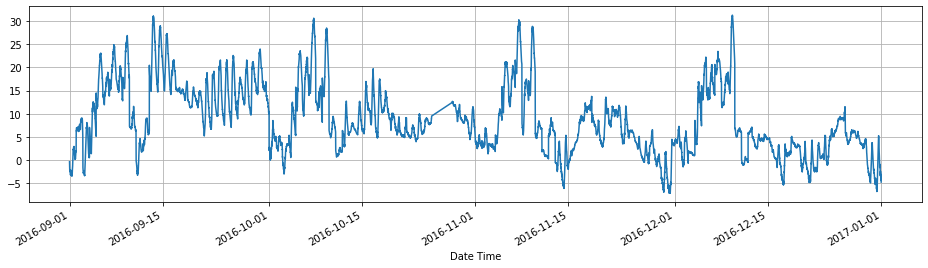

In [99]:
filt = df['Date Time'].between('2016-09-01 00:00:00','2017-01-01 00:00:00')
df[ filt ].set_index('Date Time')['T (degC)'].plot(
    figsize=(16,4),
    grid=True,
)

<AxesSubplot:ylabel='Frequency'>

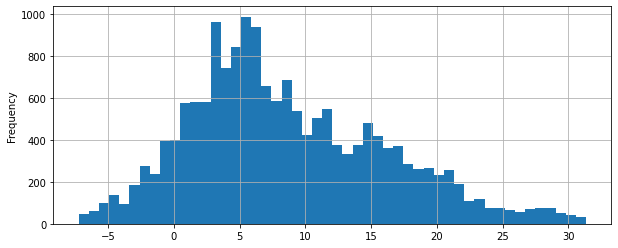

In [100]:
df[filt].set_index('Date Time')['T (degC)'].plot.hist(
    figsize=(10,4),
    grid=True,
    bins=50
)

<AxesSubplot:ylabel='Density'>

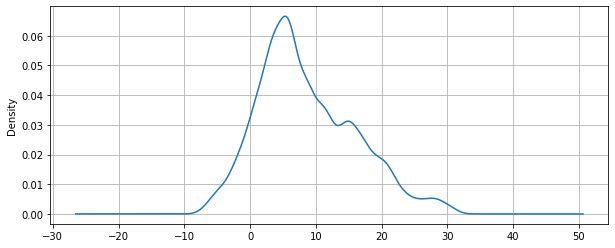

In [101]:
df[filt].set_index('Date Time')['T (degC)'].plot.kde(
    figsize=(10,4),
    grid=True
)

In [102]:
from math import ceil

fet=(len(df.columns)-1) # количество признаков
cols=2 # количество колонок на картинке с графиками
rows=int(ceil(fet/cols)) # количество строк на картинке с графиками

fet,cols,rows

(14, 2, 7)

array([[<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>],
       [<AxesSubplot:xlabel='Date Time'>,
        <AxesSubplot:xlabel='Date Time'>]], dtype=object)

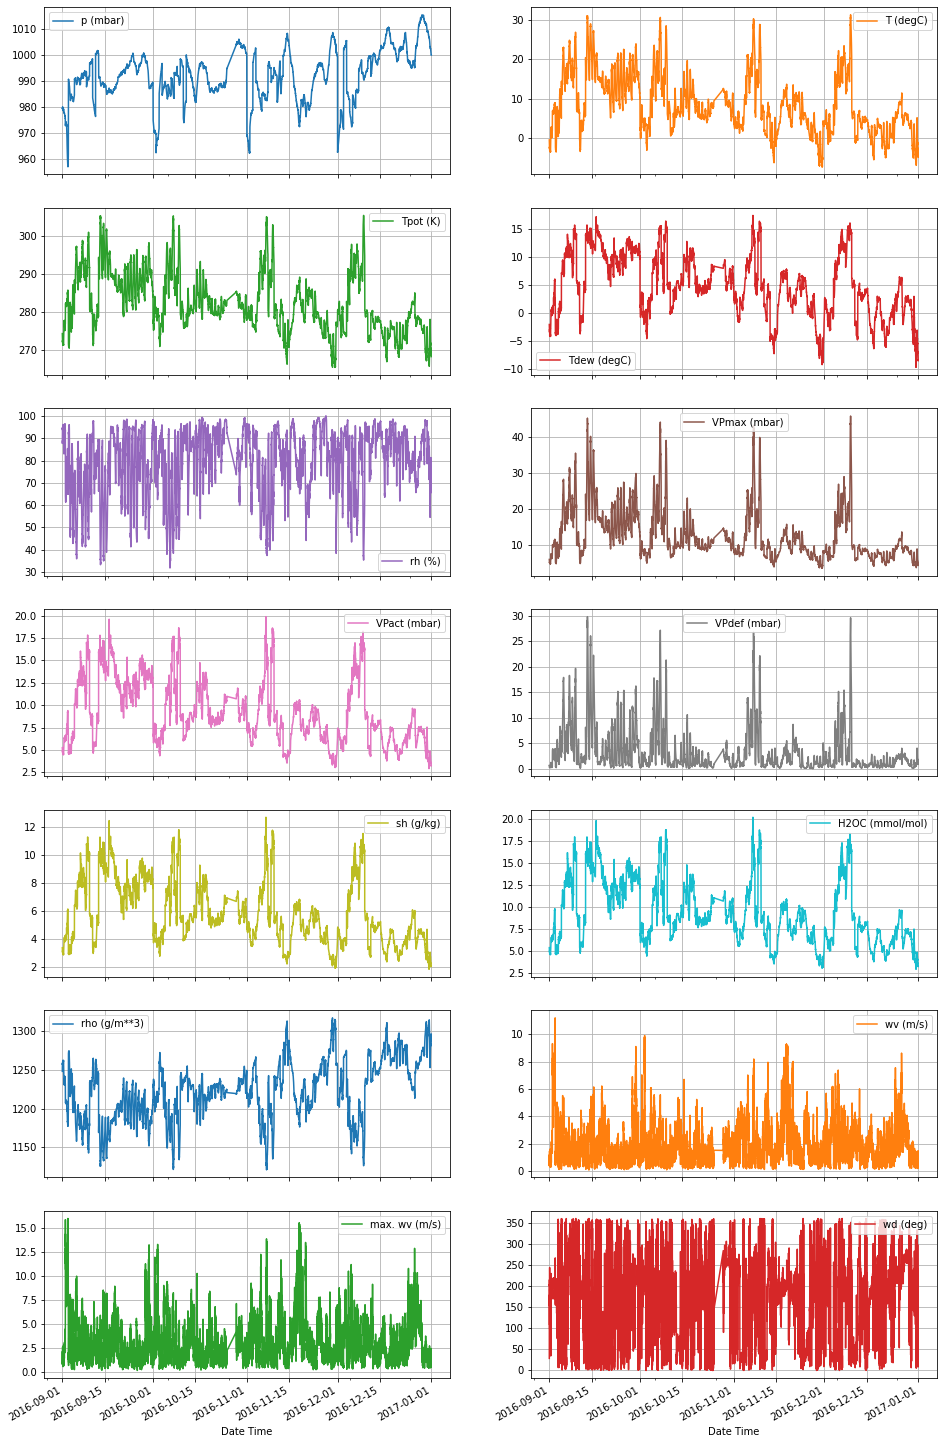

In [103]:
df[filt].set_index('Date Time').plot(
    figsize=(16,4*rows),
    grid=True,
    subplots=True,
    layout=(rows,cols)
)

In [ ]:
# fet=(len(df.columns)-1)
# cols=3
# rows=int(ceil(fet/cols))

# fet,cols,rows

In [104]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

CPU times: user 1.7 s, sys: 239 ms, total: 1.94 s
Wall time: 1.74 s


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

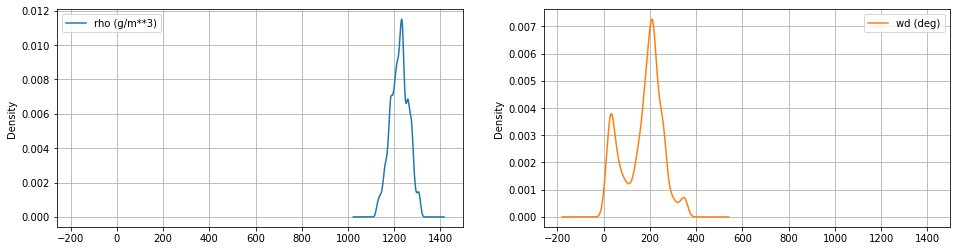

In [105]:
%%time

df[filt][['Date Time','rho (g/m**3)','wd (deg)']].set_index('Date Time').plot.kde(
    figsize=(16,4),
    grid=True,
    subplots=True,
    layout=(1,2)
)

---

In [ ]:
# упражнения

# https://github.com/ajcr/100-pandas-puzzles